# **1. Import neccesary libraries**

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import regex as re

In [2]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving international_matches.csv to international_matches.csv


In [3]:
df = pd.read_csv('international_matches.csv')
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [5]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [6]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [7]:
#Convert 'date' column type from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
#Listing all columns contain 'NaN'
null_columns = [col for col in df.columns if df[col].isnull().any()]
null_columns

['home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'home_team_mean_offense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_defense_score',
 'away_team_mean_offense_score',
 'away_team_mean_midfield_score']

# **Let's answer the following questions:**
*   Which team has the strongest offense, midfielder, defender, goalkeeper players ?
*   Which team has the highest win rate ?
*   Which team has the most time become a champion of World Cup ?
*   Which team has the longest winning streak ?
*   Is there such a thing as a home team advantage ?




In [9]:
#Filter all teams qualified to World Cup 2022
wc2022_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [11]:
for x in wc2022_teams:
  for y in null_columns:
    df[y].fillna(df[df[y[0:9]] == x][y].mean(), inplace=True)

In [12]:
#World Cup 2022 team ranking
ranks = []
for x in wc2022_teams:
  rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank', 'away_team_fifa_rank'], ascending=[False, True, True]).iloc[0]
  if rank_df['home_team'] == x:
    rank = rank_df['home_team_fifa_rank']
  else: 
    rank = rank_df['away_team_fifa_rank']
  ranks.append(rank)

team_ranks = pd.DataFrame({'Team': wc2022_teams, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


# **2. Top 10 FIFA ranking**

In [13]:
team_ranks.head(10)

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


# **3. Offensers ranking**

In [14]:
#Offensers ranking
offense_score = []
for x in wc2022_teams:
  offense = np.round((df[df['home_team'] == x]['home_team_mean_offense_score'].mean() + df[df['away_team'] == x]['away_team_mean_offense_score'].mean())/2, 2)
  offense_score.append(offense)

off_rank = pd.DataFrame({'Team': wc2022_teams, 'OF Score': offense_score}).sort_values('OF Score', ascending=False).reset_index(drop=True)
off_rank.index += 1
off_rank

,Team,OF Score
1,Argentina,83.51
2,Spain,82.41
3,France,81.91
4,Netherlands,81.88
5,Portugal,81.81
6,England,81.69
7,Brazil,81.68
8,Uruguay,80.55
9,Germany,80.43
10,Belgium,79.48


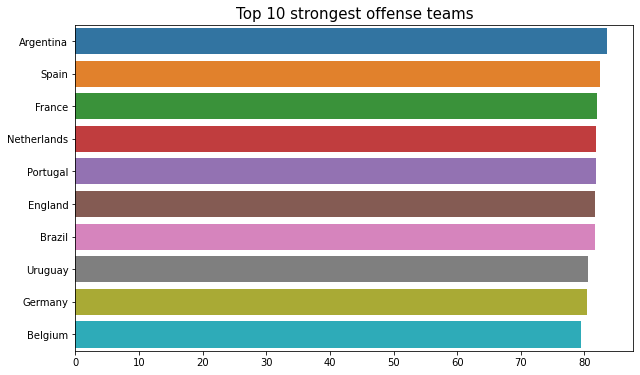

In [23]:
#Plot 10 teams w the strongest offensers
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = off_rank[:10], y = 'Team', x = 'OF Score', orientation = 'horizontal')
ax.set_title('Top 10 strongest offense teams', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

The offense score is the average FIFA game score of players in offense position within a team. It is a close result between the top 3, Argentina is at the first place when they have lots of excellent offensers (L.Messi, Di María, Dybala, etc). Second place is Brazil with lots of excellent new generation players in the world (Vinícius Jr, Rodrygo, ...), followed by Spain and a bunch of countries.

# **4. Defenders ranking**

In [19]:
#Defenders ranking
defense_score = []
for x in wc2022_teams:
  defense = np.round((df[df['home_team'] == x]['home_team_mean_defense_score'].mean() + df[df['away_team'] == x]['away_team_mean_defense_score'].mean())/2, 2)
  defense_score.append(defense)

def_rank = pd.DataFrame({'Team': wc2022_teams, 'DF Score': defense_score}).sort_values('DF Score', ascending=False).reset_index(drop=True)
def_rank.index += 1
def_rank

,Team,DF Score
1,Spain,80.64
2,Serbia,80.23
3,England,79.80
4,Germany,79.32
5,Brazil,79.31
6,France,79.19
7,Portugal,78.92
8,Argentina,78.48
9,Belgium,77.54
10,Netherlands,77.17


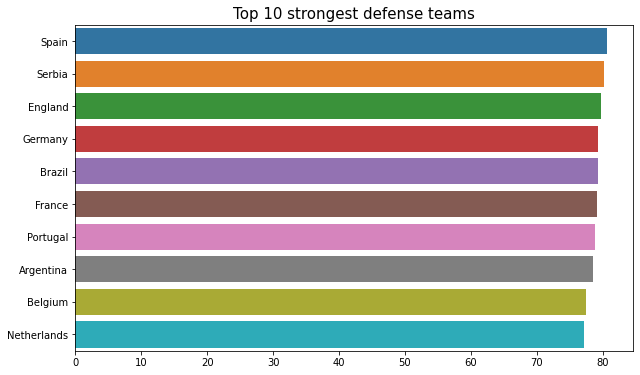

In [24]:
#Plot the team w strongest defenders
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = def_rank[:10], y = 'Team', x = 'DF Score', orientation = 'horizontal')
ax.set_title('Top 10 strongest defense teams', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

It is not a surpise when Brazil is the strongest defense team with all excellent defenders who play for top football club in the world (Real Madrid, PSG, Chelsea, etc). Spain and Germany is top 2 and 3 strongest defense team, respectively.

# **5. Midfielders ranking**

In [21]:
#Midfield ranking
mf_score = []
for x in wc2022_teams:
  mf = np.round((df[df['home_team'] == x]['home_team_mean_midfield_score'].mean() + df[df['away_team'] == x]['away_team_mean_midfield_score'].mean())/2, 2)
  mf_score.append(mf)

mid_rank = pd.DataFrame({'Team': wc2022_teams, 'MF Score': mf_score}).sort_values('MF Score', ascending=False).reset_index(drop=True)
mid_rank.index += 1
mid_rank

,Team,MF Score
1,Spain,83.11
2,France,82.04
3,Germany,81.62
4,England,81.16
5,Argentina,80.94
6,Brazil,80.82
7,Portugal,80.77
8,Netherlands,80.58
9,Serbia,80.31
10,Belgium,79.20


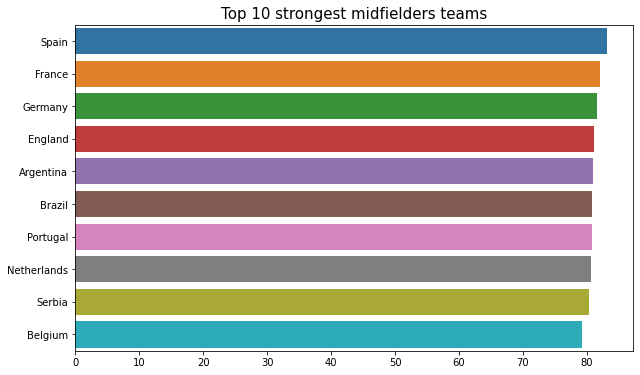

In [25]:
#Plot the team w strongest midfielders
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = mid_rank[:10], y = 'Team', x = 'MF Score', orientation = 'horizontal')
ax.set_title('Top 10 strongest midfielders teams', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

As expected, Spain is in first place, with controlling possession tactic built based quality midfielders. In second place is France's midfielders, the important factor that helped France achieves the World Cup championship in 2018.

# **6. Goalkeepers ranking**

In [26]:
#Top 10 GK scores
goalkeeper_score = []
for x in wc2022_teams:
    gk_score = np.round((df[df["home_team"]==x]['home_team_goalkeeper_score'].mean() + df[df["away_team"]==x]['away_team_goalkeeper_score'].mean())/2, 2)
    goalkeeper_score.append(gk_score)

gk_rank = pd.DataFrame({'Team':wc2022_teams, 'GK Score': goalkeeper_score}).sort_values('GK Score', ascending=False).reset_index(drop=True)
gk_rank.index += 1
gk_rank

,Team,GK Score
1,Spain,83.06
2,Germany,82.27
3,France,81.20
4,Brazil,79.82
5,England,79.11
6,Netherlands,79.03
7,Belgium,78.55
8,Portugal,78.42
9,Poland,78.18
10,USA,77.35


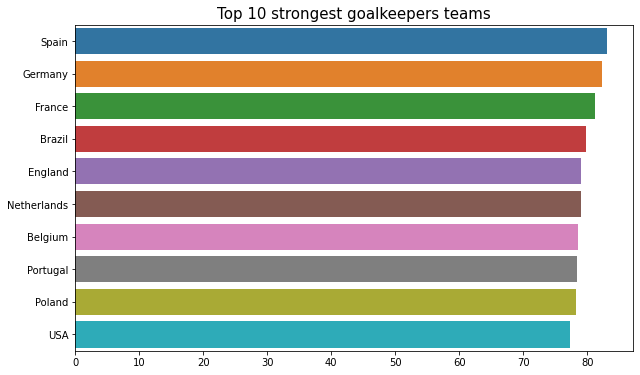

In [27]:
#Plot the team w strongest gk
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = gk_rank[:10], y = 'Team', x = 'GK Score', orientation = 'horizontal')
ax.set_title('Top 10 strongest goalkeepers teams', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

# **7. Win rate**

In [47]:
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in wc2022_teams:
    home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
    home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
    home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]
    
    away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
    away_lose = df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]  
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)

    
win_draw_lose = pd.DataFrame({'Team':wc2022_teams, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                              'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

#Total matches
win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
#Total home matches
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
# Total away matches
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])
# Win %
win_draw_lose['Win %'] = np.round(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
# Draw %
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
# Lose %
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)
# Home win %
win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'], 2)
# Home draw %
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
# Home lose %
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2)
# Away win %
win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2)
# Away draw %
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
# Away lose %
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'], 2)

win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1

win_draw_lose

<ipython-input-47-371bfb288eee>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
<ipython-input-47-371bfb288eee>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
<ipython-input-47-371bfb288eee>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]
<ipython-input-47-371bfb288eee>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
<ipython-input-47-371bfb288eee>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
<ipython-input-47-371bfb288eee>:11: UserWa

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,...,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,...,200,69.52,17.55,12.93,77.68,13.30,9.01,60.00,22.50,17.50
2,Spain,354,246,64,44,145,27,17,189,101,...,165,69.49,18.08,12.43,76.72,14.29,8.99,61.21,22.42,16.36
3,France,370,230,83,57,145,44,32,221,85,...,149,62.16,22.43,15.41,65.61,19.91,14.48,57.05,26.17,16.78
4,Germany,390,240,82,68,139,44,36,219,101,...,171,61.54,21.03,17.44,63.47,20.09,16.44,59.06,22.22,18.71
5,IR Iran,366,217,79,70,133,31,27,191,84,...,175,59.29,21.58,19.13,69.63,16.23,14.14,48.00,27.43,24.57
6,Netherlands,340,201,74,65,119,40,33,192,82,...,148,59.12,21.76,19.12,61.98,20.83,17.19,55.41,22.97,21.62
7,Portugal,336,198,79,59,123,37,24,184,75,...,152,58.93,23.51,17.56,66.85,20.11,13.04,49.34,27.63,23.03
8,Argentina,367,216,79,72,130,36,24,190,86,...,177,58.86,21.53,19.62,68.42,18.95,12.63,48.59,24.29,27.12
9,England,334,196,75,63,124,38,32,194,72,...,140,58.68,22.46,18.86,63.92,19.59,16.49,51.43,26.43,22.14
10,Croatia,320,172,79,69,92,38,24,154,80,...,166,53.75,24.69,21.56,59.74,24.68,15.58,48.19,24.70,27.11


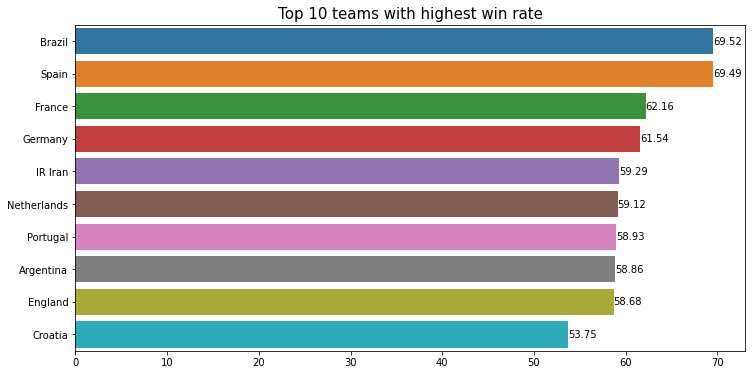

In [51]:
#Plot 10 teams w highest win rate
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
ax = sns.barplot(data = win_draw_lose[:10], y = 'Team', x = 'Win %', orientation = 'horizontal')
ax.bar_label(ax.containers[0])
ax.set_title('Top 10 teams with highest win rate', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

It is amazing that Brazil has the highest win rate 69.52% and 77.68% when they play in their home field. Spain is near enough with Brazil when their win rate is 69.49% and home win is 76.72%. Followed by France and Germany.

# **8. Number of times won the World Cup tournament**

In [52]:
#All final result of every WC
wc = df.loc[df['tournament'].str.match('FIFA World Cup$', case = True)]
#Format date 
wc['date'] = pd.to_datetime(wc['date'], format='%Y-%m-%d')
wc['year'] = wc['date'].dt.strftime('%Y')
#Select all final of all WC
wc = wc.sort_values(['date'], ascending = False)
wc['row_number'] = wc.groupby('year').cumcount()+1
wc_final = wc[wc['row_number'] == 1].drop(['row_number', 'year'], axis = 1)
wc_final

<ipython-input-52-bc95557cfd6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc['date'] = pd.to_datetime(wc['date'], format='%Y-%m-%d')
<ipython-input-52-bc95557cfd6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc['year'] = wc['date'].dt.strftime('%Y')


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_total_score,away_total_score,diff_total_score
20449,2018-07-15,France,Croatia,Europe,Europe,2,12,2164,2036,4,...,85.000000,84.000000,86.30000,86.200000,80.800000,79.300000,85.800000,85.500000,81.966667,83.500000
16936,2014-07-13,Germany,Argentina,Europe,South America,2,5,1299,1174,1,...,79.000000,84.500000,84.70000,86.000000,81.200000,89.300000,83.200000,85.066667,84.566667,85.066667
13238,2010-07-11,Netherlands,Spain,Europe,Europe,4,2,0,0,0,...,90.000000,77.800000,83.70000,83.800000,85.000000,85.300000,87.000000,81.766667,85.766667,80.766667
9727,2006-07-09,Italy,France,Europe,Europe,13,8,0,0,1,...,90.000000,90.200000,89.30000,86.500000,87.500000,91.000000,89.000000,88.666667,89.166667,87.666667
6410,2002-06-30,Germany,Brazil,Europe,South America,11,2,0,0,0,...,71.755319,70.677528,75.38481,74.887342,70.776471,75.347872,74.980851,73.649893,73.701731,71.649893
3153,1998-07-12,France,Brazil,Europe,South America,18,1,0,0,3,...,71.755319,70.677528,75.38481,74.887342,70.776471,75.347872,74.980851,73.649893,73.701731,73.649893
444,1994-07-17,Brazil,Italy,South America,Europe,3,4,0,0,0,...,71.755319,70.677528,75.38481,74.887342,70.776471,75.347872,74.980851,73.649893,73.701731,73.649893


In [53]:
#Count the total number of each team play WC final. How many win/lose. Draw chart
home = wc_final[['home_team']].rename(columns = {'home_team' : 'team'})
away = wc_final[['away_team']].rename(columns = {'away_team' : 'team'})
team_final = home.append(away)
team_count = team_final[['team']].groupby(['team']).size()
team_count.to_frame

<ipython-input-53-11674c871303>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_final = home.append(away)


<bound method Series.to_frame of team
Argentina      1
Brazil         3
Croatia        1
France         3
Germany        2
Italy          2
Netherlands    1
Spain          1
dtype: int64>

In [54]:
#WC Champion
champ = wc_final[['date', 'city', 'country']]
champ['champion'] = wc_final.apply(lambda col: col['home_team'] if col['home_team_result'] == 'Win' else col['away_team'], axis = 1)
champ_count = champ.groupby(['champion']).size()
champ_count.to_frame

<ipython-input-54-96c3a2075718>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champ['champion'] = wc_final.apply(lambda col: col['home_team'] if col['home_team_result'] == 'Win' else col['away_team'], axis = 1)


<bound method Series.to_frame of champion
Brazil     2
France     2
Germany    1
Italy      1
Spain      1
dtype: int64>

In [55]:
attend_win = pd.concat([team_count, champ_count], axis = 1).reset_index()
attend_win.columns = ['team', 'attended', 'won']
attend_win['won'] = attend_win['won'].astype('Int32')
attend_win.sort_values(by = 'won', ascending = False).fillna(0)

,team,attended,won
1,Brazil,3,2
3,France,3,2
4,Germany,2,1
5,Italy,2,1
7,Spain,1,1
0,Argentina,1,0
2,Croatia,1,0
6,Netherlands,1,0


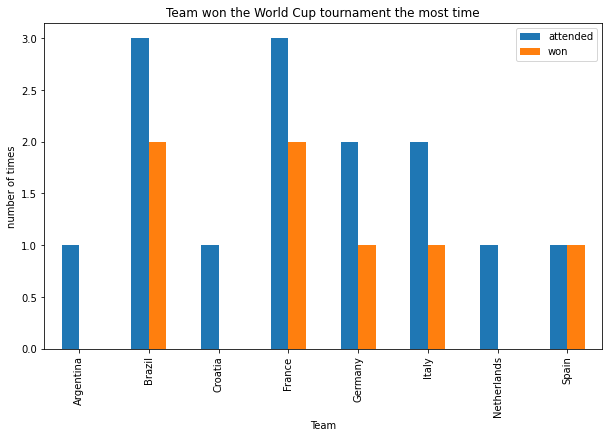

In [56]:
#Visualize attend_win
attend_win.reset_index().plot(figsize=(10, 6), x="team", y=["attended", "won"], kind="bar")
plt.title("Team won the World Cup tournament the most time")
plt.xlabel("Team")
plt.ylabel("number of times")

plt.show()

Brazil and France are two countries that both won the tournament 2 times. Followed by Germany, Italy, and Spain won once. Argentina, Croatia, and the Netherlands all attended the World Cup final once but still did not touch the championship trophy.

# **9. Home team advantage**

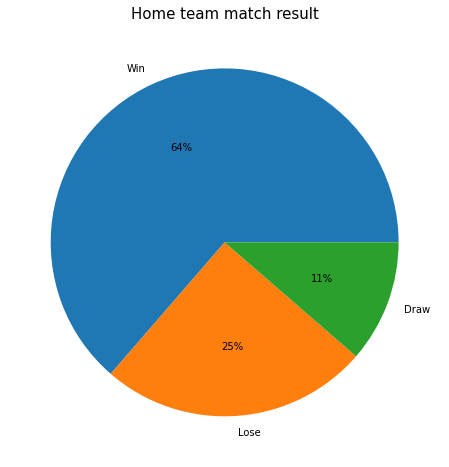

In [ ]:
#Home team advantage
#Select all matches played at non-neutral locations
home_team_adv = wc[wc['neutral_location'] == False]['home_team_result'].value_counts(normalize=True)
#plot
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
ax = plt.pie(home_team_adv, labels = ['Win', 'Lose', 'Draw'], autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

It is a huge advantage for the host team when they can play in their home country with a much larger chance of winning the game. However, sometimes there is a draw or lose result for home team because the enormous gap between the ranking and the quality of players of home team and away team

# **10. Longest winning streak**

In [ ]:
#Find team have longest win streak
streakdf = {}
for team in wc2022_teams:
  df1 = df[(df['home_team'] == team) | (df['away_team'] == team)]
  #np.where(condition, 1, 0) : if true take 1, false 0
  df1['win1'] = np.where(((df1['home_team'] == team) & (df1['home_team_result'] == 'Win')) | ((df1['away_team'] == team) & (df1['home_team_result'] == 'Lose')), 1, 0)

  name = team + '_streak'
  streakdf[name] = df1 

streaks = []
for frame in streakdf.keys():
  #ne use for compare 2 frame, shift second frame to next result.
  streakdf[frame]['start_of_streak'] = streakdf[frame]['win1'].ne(streakdf[frame]['win1'].shift())
  #find the cumulative sum of the values along the index axis.
  streakdf[frame]['streak_id'] = streakdf[frame]['start_of_streak'].cumsum()
  streakdf[frame]['streak_counter'] = streakdf[frame].groupby('streak_id').cumcount() + 1

  streak = streakdf[frame][streakdf[frame]['win1'] == 1]['streak_counter'].max()
  streaks.append(streak)

streaks
Streaks = pd.DataFrame({'Team':wc2022_teams, 'Streak': streaks}).sort_values('Streak', ascending=False).reset_index(drop=True)
Streaks.index += 1
Streaks

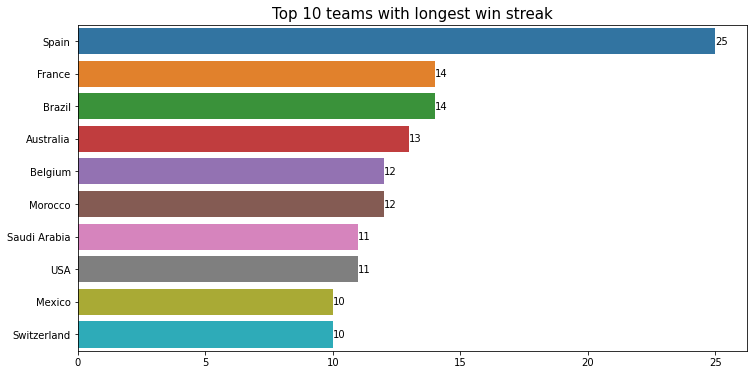

In [68]:
#Plot 10 teams w longest win streak
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
ax = sns.barplot(data = Streaks[:10], y = 'Team', x = 'Streak', orientation = 'horizontal')
ax.bar_label(ax.containers[0])
ax.set_title('Top 10 teams with longest win streak', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

Spain has the longest winning streak (25). Followed by France (14) and Brazil (14).